In [7]:
# Exercise 7.4 — Fourier filtering and smoothing
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# (a) Load data
def load_dow_series(path):
    p = Path(path)
    data = np.loadtxt(p, dtype=float, ndmin=2)
    if data.ndim == 1:
        y = data.astype(float)
    else:
        y = data[:, -1].astype(float)  # take last column as close

    # Normalize x-axis to sample index for plotting
    t = np.arange(len(y))
    return t, y

t, y = load_dow_series("Files/dow.txt")

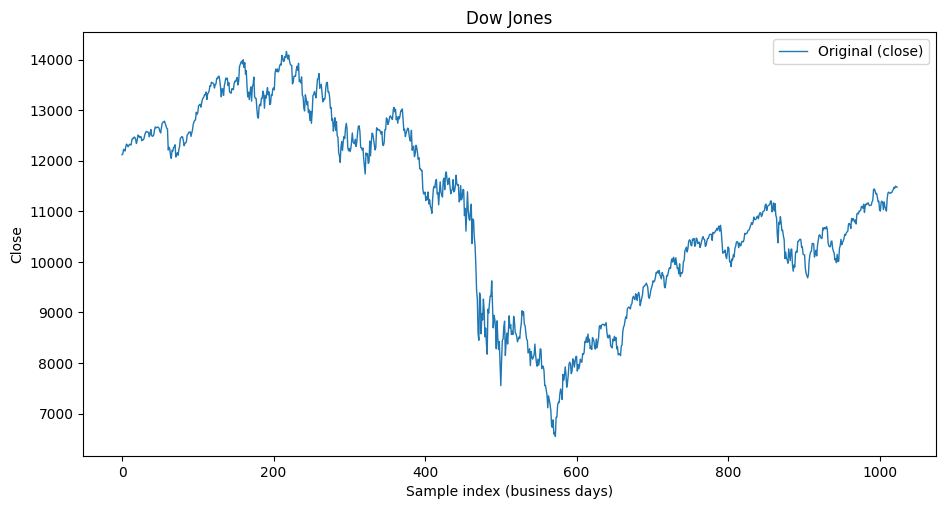

In [3]:
# Plot (a)
plt.figure(figsize=(11, 5.5))
plt.plot(t, y, lw=1.0, label="Original (close)")
plt.title("Dow Jones")
plt.xlabel("Sample index (business days)")
plt.ylabel("Close")
plt.legend()
plt.show()


In [4]:
def lowpass_rfft(y, keep_ratio):
    # Real FFT
    C = np.fft.rfft(y)
    M = C.size
    # Number to keep (at least 1 to keep the DC term)
    kept = max(1, int(np.ceil(keep_ratio * M)))
    # Zero out high-frequency tail
    C_filt = C.copy()
    C_filt[kept:] = 0.0
    # Inverse real FFT to original length
    y_smooth = np.fft.irfft(C_filt, n=len(y))
    return y_smooth, kept

In [5]:
y_10, kept10 = lowpass_rfft(y, keep_ratio=0.10)  # keep first 10%
y_02, kept02 = lowpass_rfft(y, keep_ratio=0.02)  # keep first 2%

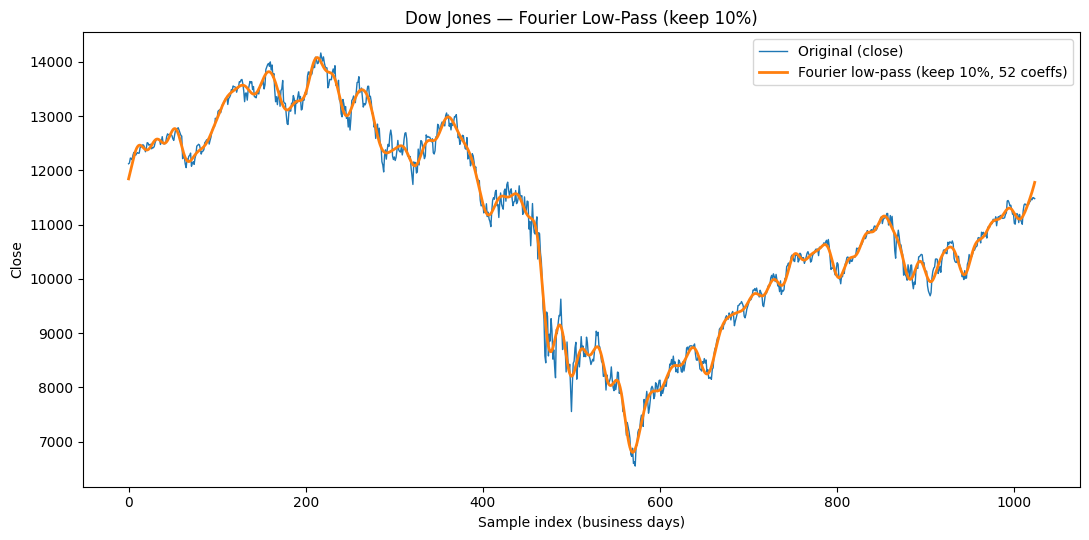

Text(0.5, 0, 'Sample index (business day)')

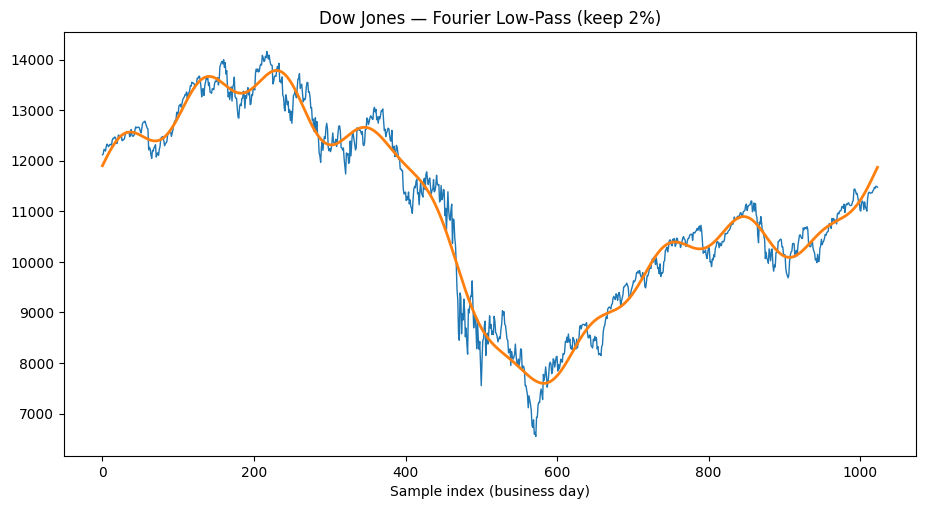

In [6]:
plt.figure(figsize=(11, 5.5))
plt.plot(t, y, lw=1.0, label="Original (close)")
plt.plot(t, y_10, lw=2.0, label=f"Fourier low-pass (keep 10%, {kept10} coeffs)")
plt.title("Dow Jones — Fourier Low-Pass (keep 10%)")
plt.xlabel("Sample index (business days)")
plt.ylabel("Close")
plt.legend()
plt.tight_layout()
plt.savefig("dow_fourier_filter_10pct.png", dpi=160)
plt.show()

plt.figure(figsize=(11, 5.5))
plt.plot(t, y, lw=1.0, label="Original (close)")
plt.plot(t, y_02, lw=2.0, label=f"Fourier low-pass (keep 2%, {kept02} coeffs)")
plt.title("Dow Jones — Fourier Low-Pass (keep 2%)")
plt.xlabel("Sample index (business day)")
